**Notebook:** Exploratory analysis of the data

In [1]:
# !pip install researchpy

In [2]:
# Libraries: 
import pandas as pd
import pyreadstat
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 20)

In [3]:
# set the current working directory 
os.chdir(os.getcwd()) 
print(os.getcwd())

C:\Users\marij\Documents\Master thesis\Upload Docs


In [4]:
# Import data for exploration
data = pd.read_csv("Appendix_MariyaHristova_11250_Feb2023_data_for_exploration.csv")  #.drop('Unnamed: 0', axis = 1)
# Import the file with the mapping of variable and question
map_variables = pd.read_csv("Appendix_MariyaHristova_11250_Feb2023_mapping.csv")

# 1. Target variable

In [5]:
# Create the target variables
data['return'] = np.NaN 
data.loc[data['q27'] <= 2, 'return'] = '1'
data.loc[data['q27'] >= 3, 'return'] = '0'

In [6]:
# Distribution 
data['q27'].value_counts()
# data['q27'].value_counts(normalize=True)
# Percentage of missing
#data['q27'].isna().sum() / len(data['q27'])
# # Number of missing 
#data['q27'].isna().sum() 

3.0    234
1.0    114
2.0    108
4.0    106
Name: q27, dtype: int64

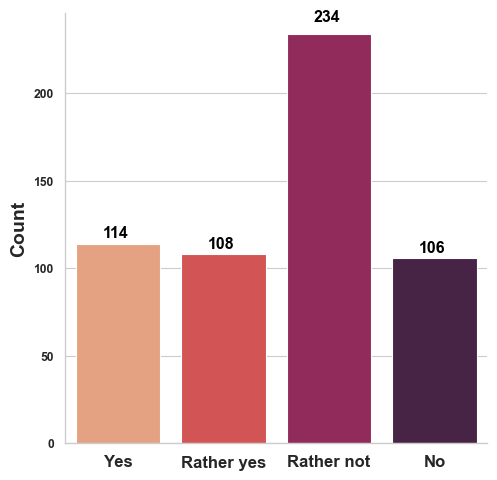

<Figure size 4000x1000 with 0 Axes>

In [7]:
# Barplot of the target variable 
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

g = sns.catplot(x="q27", kind="count", palette="rocket_r", data=data)
#g.fig.suptitle("Would you return to live in Bulgaria? (q27)",x = 0.5, y =1.06, fontsize = 14) 
g.set_axis_labels("" ,"Count", fontsize=14)
g.set_xticklabels(["Yes", "Rather yes", "Rather not" ,"No"], fontsize=12, rotation = 0)
#plt.xticks(rotation=45)

# Adding the values over the bars
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() +0.25 , 
            p.get_height() * 1.03, 
           '{0:.0f}'.format(p.get_height()), 
            color='black', 
            rotation='horizontal', 
            size='large')
plt.figure(figsize=(40,10)) 
plt.tight_layout()
#plt.savefig('barplot_q27.png', bbox_inches='tight',  dpi=600) 
#plt.show()

#possible answers: 1- Yes, 2- Rather yes, 3 - Rather not, 4 - No.#

In [8]:
# Barplot of the target variable 
#plt.figure(figsize=(40,50)) 

sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

g = sns.catplot(x="q27", kind="count", palette="rocket_r", data=data)
#g.fig.suptitle("Would you return to live in Bulgaria? (q27)",x = 0.5, y =1.06, fontsize = 14) 
g.set_axis_labels("" ,"Count", fontsize=12)
g.set_xticklabels(["1- Yes", "2- Rather yes", "3- Rather not" ,"4- No"], fontsize=12)
#plt.xticks(rotation=45)

# Adding the values over the bars
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() +0.25 , 
            p.get_height() * 1.03, 
           '{0:.0f}'.format(p.get_height()), 
            color='black', 
            rotation='horizontal', 
            size='large')
    
plt.tight_layout()
#plt.savefig('barplot_q27.png', bbox_inches='tight',  dpi=600) 
#plt.show()

#possible answers: 1- Yes, 2- Rather yes, 3 - Rather not, 4 - No.#

In [9]:
data["return"].value_counts()

0    340
1    222
Name: return, dtype: int64

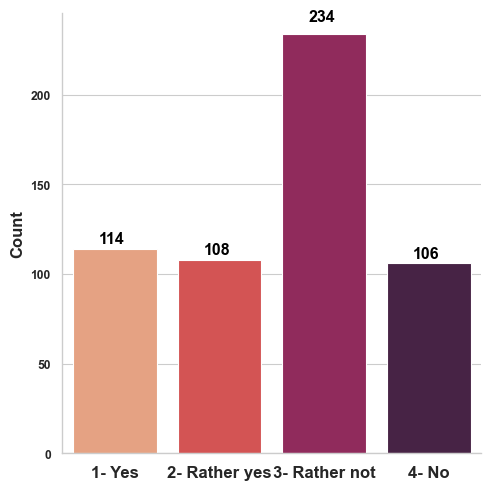

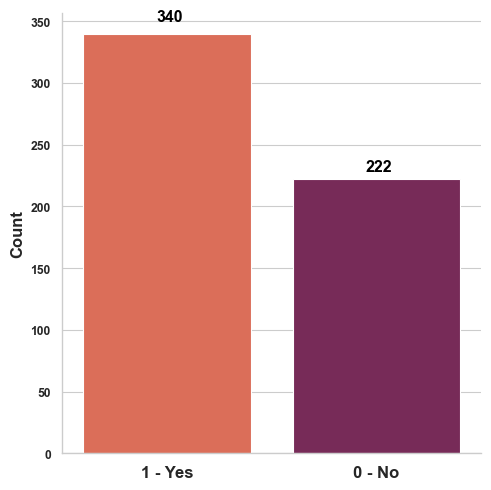

In [10]:
data["return"].value_counts()

# Barplot of the target variable 
#plt.figure(figsize=(40,50)) 

sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

g = sns.catplot(x="return", kind="count", palette="rocket_r", data=data)
#g.fig.suptitle("Would you return to live in Bulgaria? (binary)",x = 0.5, y =1.06, fontsize = 14) 
g.set_axis_labels("" ,"Count", fontsize=12)
g.set_xticklabels(["1 - Yes", "0 - No"], fontsize=12)
#plt.xticks(rotation=45)

# Adding the values over the bars
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() +0.35 , 
            p.get_height() * 1.03, 
           '{0:.0f}'.format(p.get_height()), 
            color='black', 
            rotation='horizontal', 
            size='large')
    
plt.tight_layout()
#plt.savefig('barplot_return_binary.png', bbox_inches='tight',  dpi=600) 
plt.show()

#possible answers: 1- Yes, 2- Rather yes, 3 - Rather not, 4 - No.#

In [11]:
print("Percentage of 0s (Return: No)", round((340/ 562)*100,2))
print("Percentage of 1s (Return: Yes)", round((222/ 562)*100,2))

Percentage of 0s (Return: No) 60.5
Percentage of 1s (Return: Yes) 39.5


# 2. Return and Gender 

In [12]:
# Cross tabs 
display(pd.crosstab(data['return'], data['q4'])) # 0 female, 1 male
display(pd.crosstab(data['return'], data['q4'], normalize='index'))
# Female higher percentage than men 

q4,0.0,1.0
return,,
0,212,128
1,126,96


q4,0.0,1.0
return,,
0,0.623529,0.376471
1,0.567568,0.432432


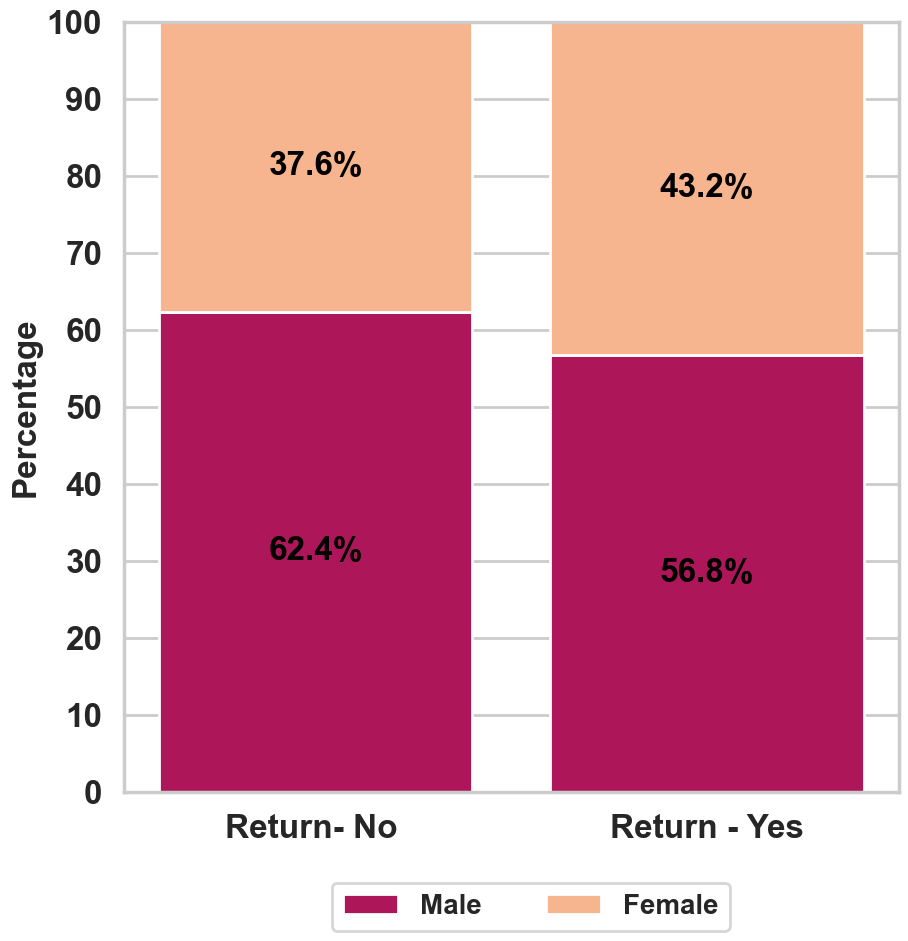

In [13]:
# Stacked barplot for education categories and return 
sns.set_style("whitegrid")
sns.set_context("poster")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(10,10)) 

# df_grouped_0_list = pd.Series([0,0,0,0,70,130,120,20])
# df_grouped_1_list = pd.Series([0,0,0,2,66,70,66,18])
# df_grouped_list = pd.Series([0,0,0, 2, 136, 200, 186, 38])

df_grouped_0_list = pd.Series([212, 126]) # no return 
df_grouped_1_list = pd.Series([128, 96]) # yes return 
df_grouped_list = pd.Series([340 ,222]) # total 

N = len(df_grouped_list)
count_no_0 = (df_grouped_0_list[0:2]/df_grouped_list[0:2]*100).tolist()  # when devided shows the percentage 
count_yes_1 = (df_grouped_1_list[0:2]/df_grouped_list[0:2]*100).tolist()

ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, count_no_0, color=['#ad1759'], width = width )  # bottom 
p2 = plt.bar(ind, count_yes_1,
             bottom=count_no_0, color = ['#f6b48f'], width = width)

plt.ylabel('Percentage', fontsize = 24)
#plt.title('Gender and return intentions', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ('Return- No ', "Return - Yes"), fontsize = 24) # removed "Master's degree" --> no observations


plt.yticks(np.arange(0, 101, 10), fontsize = 24) # y ticks
plt.ylim(0, 100) # sets the y axis limits
plt.legend((p1[0], p2[0]), ( 'Male', 'Female'), fontsize = 24,  bbox_to_anchor=(1, 0.13)) #   bbox_to_anchor=(1, 0.1) # ,loc=1

# Showing the values
for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '%.1f%%' % h1, ha="center", va="center", color="black", fontsize=24) #"%.1f" 2 decimal digiits no % sign  
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '%.1f%%' % h2, ha="center", va="center", color="black", fontsize=24) # fontweight="bold"

plt.legend((p1[0], p2[0]), ('Male ', 'Female'), fontsize = 20,loc = 'best', bbox_to_anchor= (0.8, -0.1), ncol= 2)  #   bbox_to_anchor=(1, 0.1) # ,loc=1 # bbox_to_anchor = (1, 0.14)

#plt.xticks(rotation=-45)
#plt.savefig('gender_return_intention.png', bbox_inches='tight',  dpi=600) 
plt.show()

# 3. Return and age 

In [14]:
df_age_cat = pd.DataFrame(data["q5_rec"].value_counts())
df_age_cat.reset_index(inplace = True)
df_age_cat.columns = ["Category", "Count"]
df_age_cat = df_age_cat.sort_values(by = "Category")
df_age_cat

,Category,Count
1,1.0,102
3,2.0,91
4,3.0,90
0,4.0,104
2,5.0,102
5,6.0,77
7,7.0,54
6,8.0,54


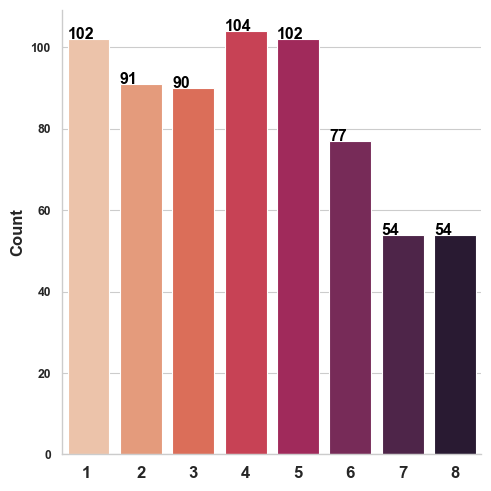

In [15]:
sns.set_context("paper")
sns.set_style("whitegrid")

g = sns.catplot(x="q5_rec", kind="count", palette="rocket_r", data=data)
#g.fig.suptitle("Would you return to live in Bulgaria? (binary)",x = 0.5, y =1.06, fontsize = 14) 
g.set_axis_labels("" ,"Count", fontsize=12)
g.set_xticklabels(["1 ", "2" ,"3", "4", "5", "6", "7", "8"], fontsize=12)
#plt.xticks(rotation=45)

# Adding the values over the bars
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x(),  #+ 0.35 , 
             p.get_height() , #* 1.03, 
            '{0:.0f}'.format(p.get_height()), 
             color='black', 
             rotation='horizontal', 
             size='large')
    
plt.tight_layout()
#plt.savefig('barplot_return_binary.png', bbox_inches='tight',  dpi=600) 
plt.show()

In [16]:
# T- test 
#data_1 = data[data['return'] == '1']
#data_0 = data[data['return'] == '0']

# Perform a t-test see if the mean values in the two groups are identical
# Null mean1 = mean2 
import researchpy as rp
import scipy.stats as stats

summary, results = rp.ttest(group1= data['q5'][data['return'] == '0'], group1_name= "No",
         group2= data['q5'][data['return'] == '1'], group2_name= "Yes")

print(summary)
print(results)

# Alternative way
stats.ttest_ind(data['q5'][data['return'] == '0'],data['q5'][data['return'] == '1'])

# https://www.pythonfordatascience.org/independent-samples-t-test-python/
# p-value of p-value = 0.5386, we cannot reject the Null hypothesis of identical means. That means there is not significant difference betweehn the values. 

   Variable      N       Mean         SD        SE  95% Conf.   Interval
0        No  340.0  35.582353  11.928832  0.646932  34.309847  36.854859
1       Yes  222.0  34.981982  10.282861  0.690140  33.621883  36.342081
2  combined  562.0  35.345196  11.301652  0.476731  34.408799  36.281592
          Independent t-test   results
0   Difference (No - Yes) =     0.6004
1      Degrees of freedom =   560.0000
2                       t =     0.6153
3   Two side test p value =     0.5386
4  Difference < 0 p value =     0.7307
5  Difference > 0 p value =     0.2693
6               Cohen's d =     0.0531
7               Hedge's g =     0.0530
8          Glass's delta1 =     0.0503
9        Point-Biserial r =     0.0260


C:\Users\marij\anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


Ttest_indResult(statistic=0.6152971233158697, pvalue=0.5386084754137253)

The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

# 4. Income and return 

In [17]:
import seaborn as sns
pal = sns.color_palette("rocket")
display(pal.as_hex())
pal_codes = sns.color_palette("rocket").as_hex()
print(pal_codes)

['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']

['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']


In [18]:
pd.crosstab(data['return'], data['q18_rec'])

q18_rec,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
return,,,,,,,,
0,10,36,56,66,50,28,10,62
1,16,30,46,38,26,12,8,34


In [19]:
# Stacked bar graph, income and return  0 - no income, 7 - above 3500 euros, #q18_rec

df_grouped = data[["q18_rec", "return"]].groupby([ 'return','q18_rec']).count().unstack()

df_grouped = data[["q18_rec", "return"]].groupby([ 'q18_rec']).count().unstack()
df_grouped_0 = data[data["return"]== '0'][["q18_rec", "return"]].groupby([ 'q18_rec']).count().unstack()
df_grouped_1 = data[data["return"]== '1'][["q18_rec", "return"]].groupby([ 'q18_rec']).count().unstack()

#print(df_grouped)
#print(df_grouped_0)
#print(df_grouped_1)
# Created a table in the adta descriptio excel file: Income categories and return. Count
# print(df_grouped_0/df_grouped*100)
# print(df_grouped_1/df_grouped*100)

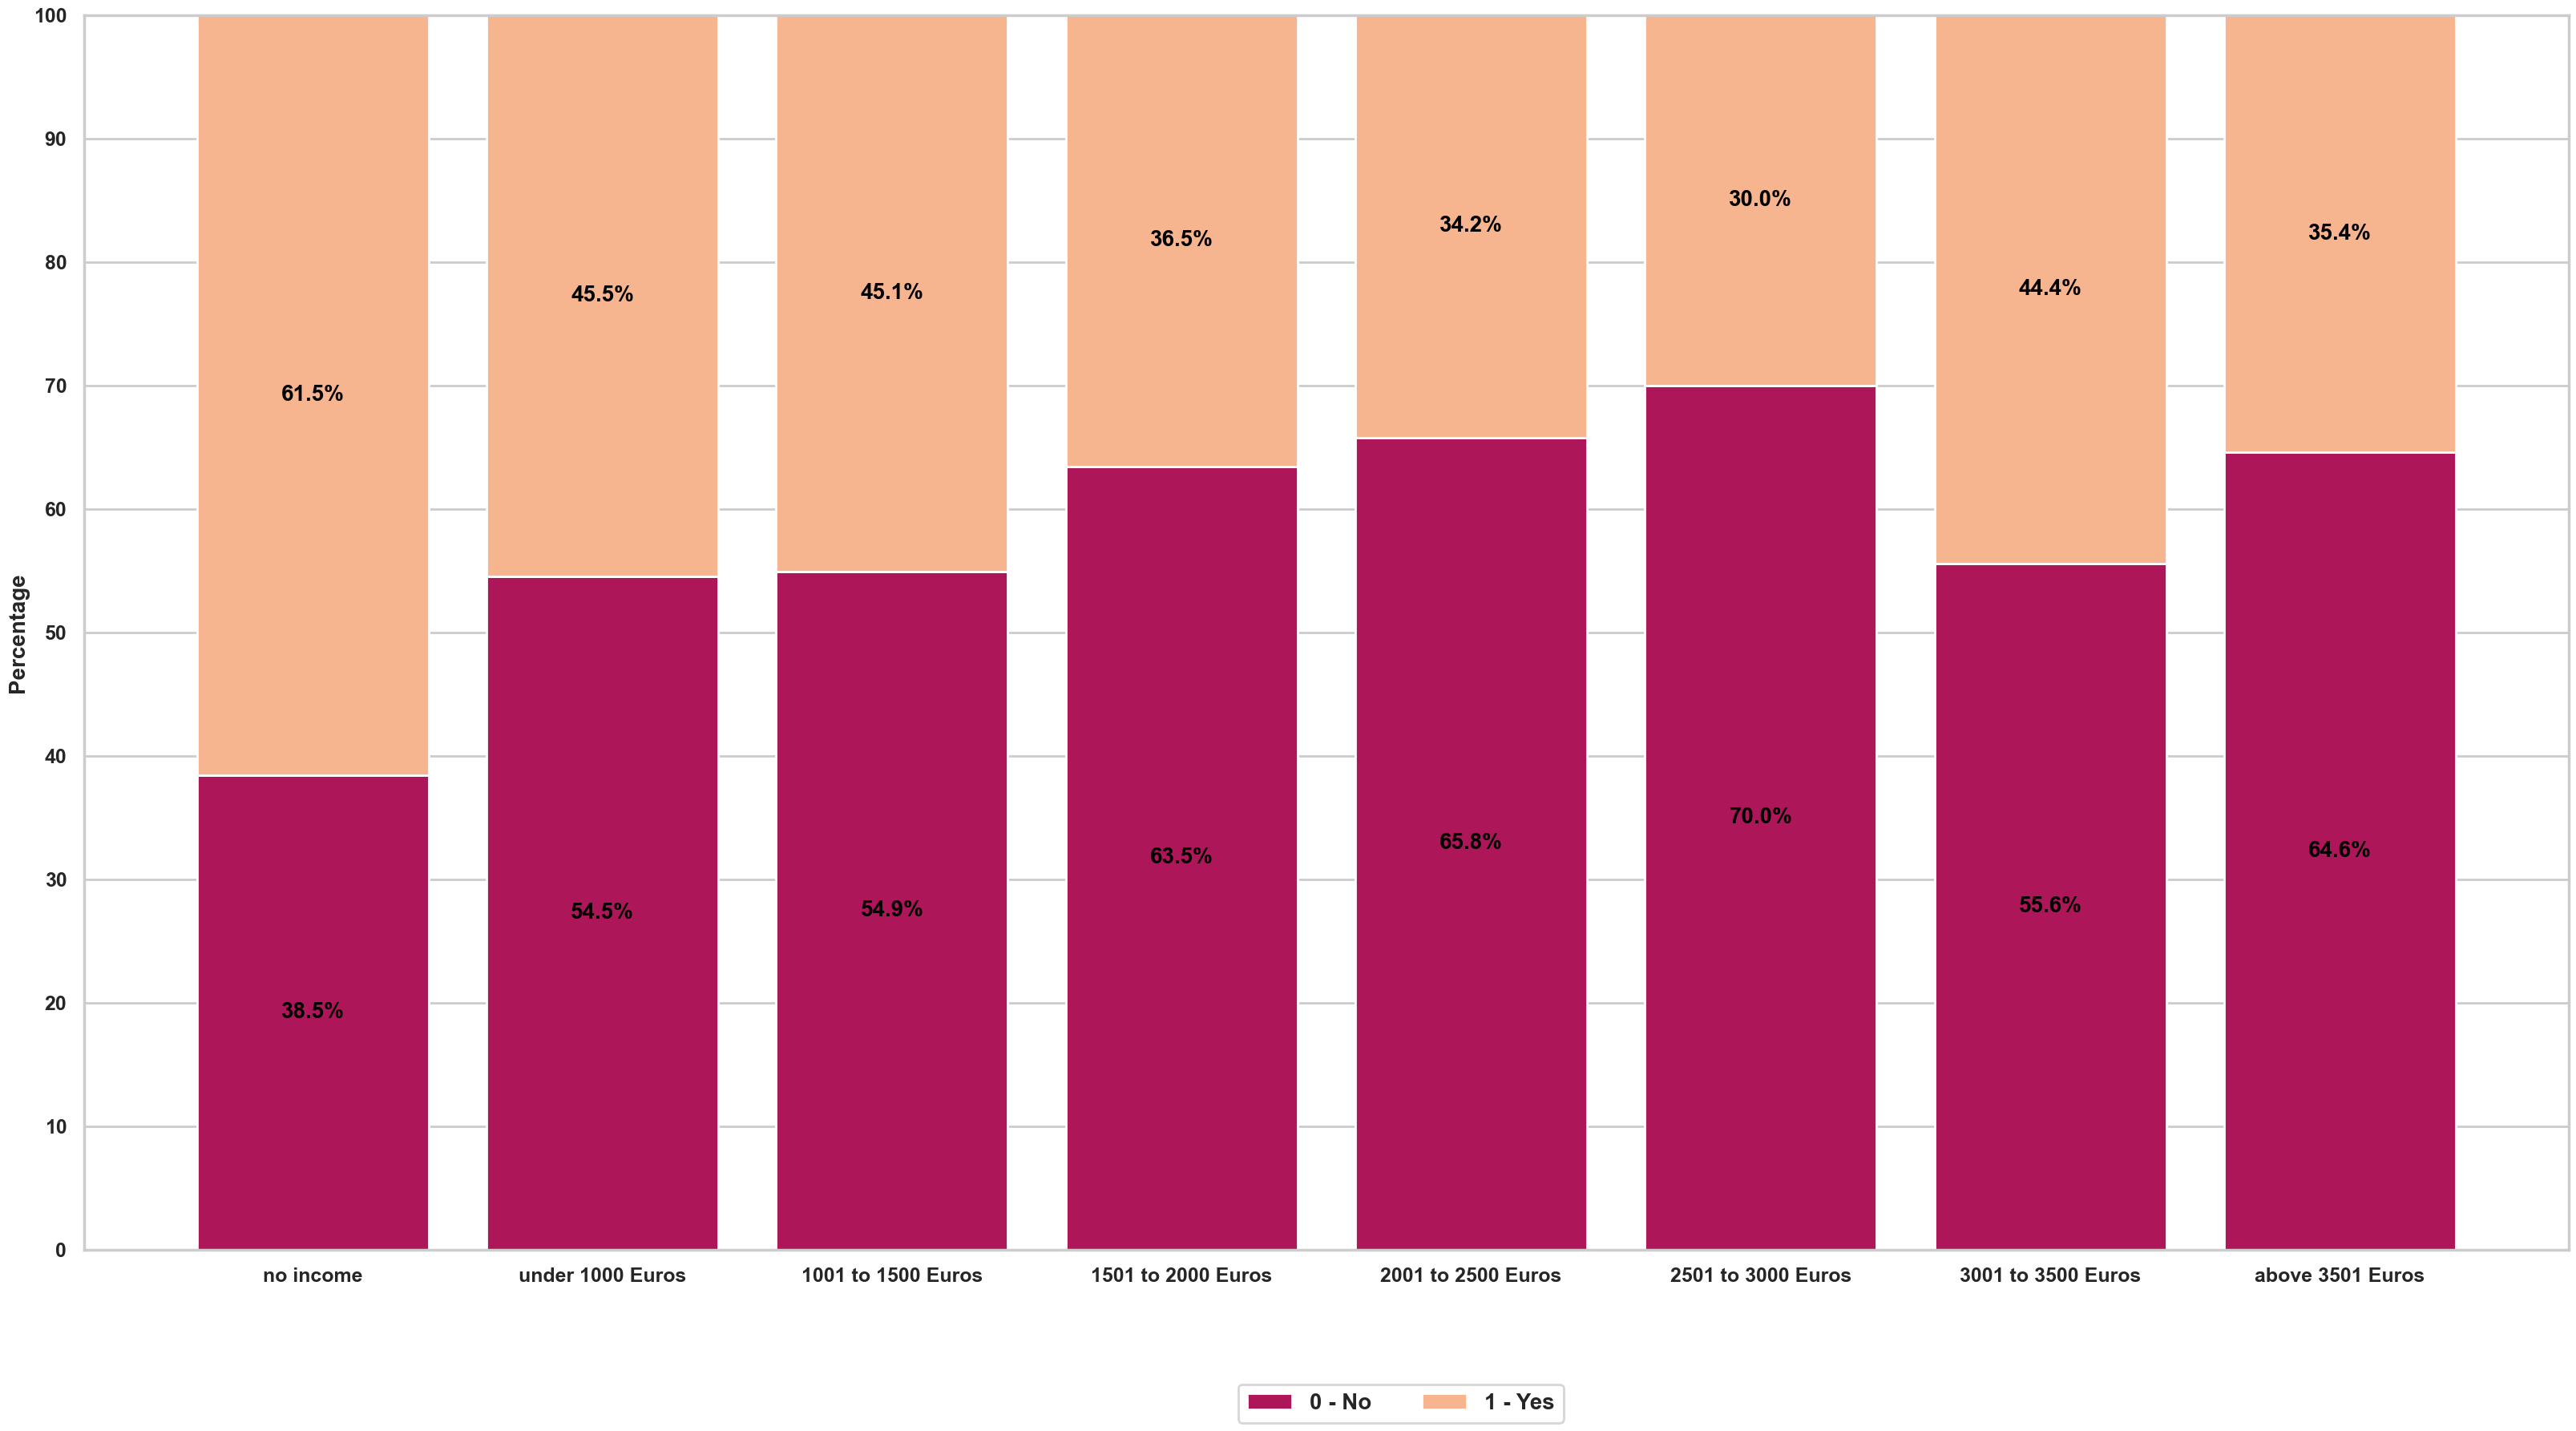

In [20]:
sns.set_style("whitegrid")
sns.set_context("poster")

# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.figure(figsize=(40,20)) 

N = len(df_grouped)
count_no_0 = (df_grouped_0/df_grouped*100).tolist()  # when devided shows the percentage 
count_yes_1 = (df_grouped_1/df_grouped*100).tolist()

ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, count_no_0, color=['#ad1759'], width = width , label = ["0 - No"])  # bottom 
p2 = plt.bar(ind, count_yes_1,
             bottom=count_no_0, color = ['#f6b48f'], width = width, label = ["1 - Yes"])

plt.ylabel('Percentage', fontsize = 20)
#plt.title('Percentage of people who would return or not grouped by income category (in Euros)', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ('no income' , 'under 1000 Euros', '1001 to 1500 Euros', 
                 '1501 to 2000 Euros', '2001 to 2500 Euros', 
                 '2501 to 3000 Euros', '3001 to 3500 Euros', 
                 'above 3501 Euros'), fontsize = 18)

plt.yticks(np.arange(0, 101, 10), fontsize = 18) # y ticks
plt.ylim(0, 100) # sets the y axis limits

plt.legend((p1[0], p2[0]), ('0 - No ', '1 - Yes'), fontsize = 20,loc = 'best', bbox_to_anchor= (0.6, -0.1), ncol= 2)  #   bbox_to_anchor=(1, 0.1) # ,loc=1 # bbox_to_anchor = (1, 0.14)

# Showing the values
for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '%.1f%%' % h1, ha="center", va="center", color="black", fontsize=20) #"%.1f" 2 decimal digiits no % sign  
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '%.1f%%' % h2, ha="center", va="center", color="black", fontsize=20) # fontweight="bold"
    
#plt.xticks(rotation=-45)
#plt.savefig('income_return_stacked_barplot.pdf', bbox_inches='tight',  dpi=600) 
plt.show()

# 5. Education in Bulgaria and return

In [21]:
# Import the data where the variale education is already derived
data = pd.read_csv("Appendix_MariyaHristova_11250_Feb2023_data_clean.csv")

pd.crosstab(data['return'], data['q6'])

KeyError: 'q6'

In [ ]:
data['q18_rec'].unique()

In [ ]:
value_counts_edu_bg = pd.DataFrame(data['education'].value_counts())
value_counts_edu_bg.reset_index(inplace = True)
value_counts_edu_bg.sort_values(by = 'index', ascending = True)

In [ ]:
# Education acquired in Bulgaria: q6, 0 - lowest, 7 - highest 

# 0-  I have no education acquired in Bulgaria
# 1-  Lower than elementary education 
# 2-  Elementary education 
# 3-  Primary education 
# 4-  Secondary education
# 5-  Higher - Bachelor's degree
# 6-  Higher - Master's degree
# 7 - Higher - degree "PhD"

# Stacked bar graph, education and return 

df_grouped = data[["q6", "return"]].groupby([ 'return','q6']).count().unstack()

df_grouped = data[["q6", "return"]].groupby([ 'q6']).count().unstack()
df_grouped_0 = data[data["return"]== 0][["q6", "return"]].groupby([ 'q6']).count().unstack()
df_grouped_1 = data[data["return"]== 1][["q6", "return"]].groupby([ 'q6']).count().unstack()

# print(df_grouped)
# print(df_grouped_0)
# print(df_grouped_1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_context("poster")


plt.figure(figsize=(30,15)) 

N = len(df_grouped)
count_no_0 = (df_grouped_0/df_grouped*100).tolist()  # when devided shows the percentage 
count_yes_1 = (df_grouped_1/df_grouped*100).tolist()

ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, count_no_0, color=['#ad1759'], width = width )  # bottom 
p2 = plt.bar(ind, count_yes_1,
             bottom=count_no_0, color = ['#f6b48f'], width = width)

plt.ylabel('Percentage', fontsize = 20)
#plt.title('Percentage of people who would return or not grouped by education category in BG', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ('No education' , 'Lower than elementary', 'Elementary', 
                 'Primary', 'Secondary', "Bachelor's degree",  "PhD"), fontsize = 20) # removed "Master's degree" --> no observations


plt.yticks(np.arange(0, 101, 10), fontsize = 20) # y ticks
plt.ylim(0, 100) # sets the y axis limits
plt.legend((p2[0], p1[0]), ('0 - No ', '1 - Yes'), fontsize = 20,  bbox_to_anchor=(1, 0.09)) #   bbox_to_anchor=(1, 0.1) # ,loc=1

# Showing the values
for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '%.1f%%' % h1, ha="center", va="center", color="black", fontsize=20) #"%.1f" 2 decimal digiits no % sign  
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '%.1f%%' % h2, ha="center", va="center", color="black", fontsize=20) # fontweight="bold"

#plt.xticks(rotation=-45)
#plt.savefig('income_return_stacked_barplot.pdf', bbox_inches='tight',  dpi=600) 
plt.show()

## Education abroad and return

In [ ]:
pd.crosstab(data['return'], data['q7'])

In [ ]:
# Education acquired in Bulgaria: q6, 0 - lowest, 7 - highest 

# 0-  I have no education acquired in Bulgaria
# 1-  Lower than elementary education 
# 2-  Elementary education 
# 3-  Primary education 
# 4-  Secondary education
# 5-  Higher - Bachelor's degree
# 6-  Higher - Master's degree
# 7 - Higher - degree "PhD"

# Stacked bar graph, education and return 

df_grouped = data[["q7", "return"]].groupby([ 'return','q7']).count().unstack()

df_grouped = data[["q7", "return"]].groupby([ 'q7']).count().unstack()
df_grouped_0 = data[data["return"]== 0][["q7", "return"]].groupby([ 'q7']).count().unstack()
df_grouped_1 = data[data["return"]== 1][["q7", "return"]].groupby([ 'q7']).count().unstack()

# print(df_grouped)
# print(df_grouped_0)
# print(df_grouped_1)

## Education abroad or in BG and return 

In [ ]:
# Moved this part in the import and clean Notenook 
pd.crosstab(data['return'], data['education'])
# eduaction_replace_map = {'Education ': {5:5 , 6:5, 7: 5}} 
# Combined the categories Bachelor's or Masters and PhD into one category, because there were not enough observations
# data.replace(eduaction_replace_map, inplace=True)

In [ ]:
pd.crosstab(data['return'], data['education'])

In [ ]:
data['education'].value_counts()

In [ ]:
data[data['education'] == 0]['return']

In [ ]:
# Education acquired in Bulgaria: q6, 0 - lowest, 7 - highest 

# 0-  I have no education acquired in Bulgaria
# 1-  Lower than elementary education 
# 2-  Elementary education 
# 3-  Primary education 
# 4-  Secondary education
# 5-  Higher - Bachelor's degree
# 6-  Higher - Master's degree
# 7 - Higher - degree "PhD"

# Stacked bar graph, education and return 

df_grouped = data[["education", "return"]].groupby([ 'return','education']).count().unstack()

df_grouped = data[["education", "return"]].groupby([ 'education']).count().unstack()
df_grouped_0 = data[data["return"]== 0][["education", "return"]].groupby([ 'education']).count().unstack()
df_grouped_1 = data[data["return"]== 1][["education", "return"]].groupby([ 'education']).count().unstack()

# print(df_grouped)
# print(df_grouped_0)
# print(df_grouped_1)

In [ ]:
data['education'].value_counts()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 

sns.set_style("whitegrid")
sns.set_context("poster")

plt.figure(figsize=(20,10)) 

N = len(df_grouped)  + 2
#count_no = (0,0,0, 2, 136, 200, 186, 38)
count_no = (2,0,0, 2, 174, 240, 210, 38) ### Corect values 

ind = np.arange(N)    # the x locations for the groups
width = 0.8   # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, count_no, color=['#701f57','#701f57','#701f57','#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f'], 
             width = width )  # bottom # #ad1759

plt.ylabel('Count', fontsize = 24)
#plt.title('Count of people who would return or not grouped by education category', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ("No education", '< Elementary', 'Elementary', 
                 'Primary', ' Secondary', "Bachelor", "Master" ,"PhD"), fontsize = 18) # removed "Master's degree" --> no observations

plt.yticks(np.arange(0, 241, 20), fontsize = 24) # y ticks
plt.ylim(0, 240) # sets the y axis limits
#plt.legend((p1[0], p2[0]), ('0 - No ', '1 - Yes'), fontsize = 20,  bbox_to_anchor=(1, 0.09)) #   bbox_to_anchor=(1, 0.1) # ,loc=1

# Showing the values : MH 
for i in p1:
    h1 = i.get_height()
    if h1 < 3:
        # If the value is 0, show the value slightly above the x axis
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 + 6, "%.0f" % h1, ha="center", color="black", fontsize=24, fontweight="bold")
    else: 
        # If the values is not 0, show the value in the middle of the bar
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 , "%.0f" % h1, ha="center", va="center", color="black", fontsize=24, fontweight="bold")
plt.xticks(rotation=0)
#plt.savefig('income_return_stacked_barplot_count.png', bbox_inches='tight',  dpi=600) 
plt.show()

In [ ]:
pd.crosstab(data['return'], data['education'])

In [ ]:
# Stacked barplot for education categories and return 
sns.set_style("whitegrid")
sns.set_context("poster")

plt.figure(figsize=(20,10)) 

# note that the no education group has not answered the return question 
# merged the primary and secondary category, because the primary is 0, we can not dicide by zero, lol 

df_grouped_0_list = pd.Series([0,0,0, 0, 70,  130, 120, 20])
df_grouped_1_list = pd.Series([0,0,0, 2, 66,  70,  66,  18])
df_grouped_list =   pd.Series([0,0,0, 2, 136, 200, 186, 38])

N = len(df_grouped_list) - 4
count_no_0 = (df_grouped_0_list[4:9]/df_grouped_list[4:9]*100).tolist()  # when devided shows the percentage 
count_yes_1 = (df_grouped_1_list[4:9]/df_grouped_list[4:9]*100).tolist()

ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, count_no_0, color=['#ad1759'], width = width )  # bottom 
p2 = plt.bar(ind, count_yes_1,
             bottom=count_no_0, color = ['#f6b48f'], width = width)

plt.ylabel('Percentage', fontsize = 24)
#plt.title('Percentage of people who would return or not grouped by education category in BG or abroad', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ( 'Primary/Secondary', "Bachelor", "Master" ,"PhD"), fontsize = 24) # removed "Master's degree" --> no observations

plt.yticks(np.arange(0, 101, 10), fontsize = 20) # y ticks
plt.ylim(0, 100) # sets the y axis limits
#plt.legend((p1[0], p2[0]), ( '0 - No', '1 - Yes'), fontsize = 20,  bbox_to_anchor=(1, 0.09)) #   bbox_to_anchor=(1, 0.1) # ,loc=1
plt.legend((p1[0], p2[0]), ('0 - No ', '1 - Yes'), fontsize = 24,loc = 'best', bbox_to_anchor= (0.6, -0.1), ncol= 2) # below the plot 
# Showing the values
for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '%.1f%%' % h1, ha="center", va="center", color="black", fontsize=24) #"%.1f" 2 decimal digiits no % sign  
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '%.1f%%' % h2, ha="center", va="center", color="black", fontsize=24) # fontweight="bold"

    
#plt.xticks(rotation=-45)
#plt.savefig('income_return_stacked_barplot_perc.png', bbox_inches='tight',  dpi=600) 
plt.show()

In [ ]:
# df_grouped
data.columns.tolist()

print(data['q15_1'].sum())  # Germany
print(data['q15_2'].sum())  # UK 
print(data['q15_3'].sum())  # Spain
print(data['q15_4'].sum())  # Greece
print(data['q15_5'].sum())   # France
print(data['q15_6'].sum())  # Italy 
print(data['q15_7'].sum())  # Turkey 
print(data['q15_8'].sum())  # USA
print(data['q15_9'].sum())   # Canada
print(data['q15_10'].sum())  # Other  # 212

In [ ]:
#number_of_imigrants =
[data['q15_1'].sum()]

countries_count = [66,74,90, 22, 100, 18, 2, 78, 12, 212]
countries_perc = []
for i in countries_count: 
    perc =  round(i/674*100,1)
    countries_perc.append(perc)
countries_perc

# Destination countries 

In [ ]:
### Countries

import numpy as np
import matplotlib.pyplot as plt

# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 

sns.set_style("whitegrid")
sns.set_context("poster")

plt.figure(figsize=(30,15)) 

N = len(df_grouped)  + 2
count_no = (66,74,90, 22, 100, 18, 2, 78, 12, 212)
count_perc = (9.8, 11.0, 13.4, 3.3, 14.8, 2.7, 0.3, 11.6, 1.8, 31.5)

#674 - (66 +74+90+ 22+ 100+ 18+ 2+ 78+ 12)  # 1 to 9 to the question  

ind = np.arange(N)    # the x locations for the groups

ind = np.arange(10)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

#p1 = plt.bar(ind, count_no, color=['#701f57','#701f57','#701f57','#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f'], width = width )  # bottom # #ad1759

p1 = plt.bar(ind, count_no, color=['#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f'], width = width )  # bottom # #ad1759
#p1 = plt.bar(ind, count_no, color=['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f', '#35193e', '#701f57', '#ad1759', '#e13342'], width = width )  # bottom # #ad1759

plt.ylabel('Count', fontsize = 20)
#plt.title('Count of people by destination country', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ("Germany", 'UK', 'Spain', 
                 'Greece', ' France', "Italy", "Turkey" ,"USA", "Canada", 'Other'), fontsize = 20) 

plt.yticks(np.arange(0, 281, 20), fontsize = 20) # y ticks
plt.ylim(0, 280) # sets the y axis limits
#plt.legend((p1[0], p2[0]), ('0 - No ', '1 - Yes'), fontsize = 20,  bbox_to_anchor=(1, 0.09)) #   bbox_to_anchor=(1, 0.1) # ,loc=1

# Showing the values : MH 
for i in p1:
    h1 = i.get_height()
    if h1 < 3:
        # If the value is 0, show the value slightly above the x axis
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 + 6, "%.0f" % h1, ha="center", color="black", fontsize=20, fontweight="bold")
    else: 
        # If the values is not 0, show the value in the middle of the bar
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 , "%.0f" % h1, ha="center", va="center", color="black", fontsize=20, fontweight="bold")
    

#plt.xticks(rotation=-45)
#plt.savefig('countries_bar_plot.png', bbox_inches='tight',  dpi=600) 
plt.show()

In [ ]:
### Countries

import numpy as np
import matplotlib.pyplot as plt

# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 

sns.set_style("whitegrid")
sns.set_context("poster")

plt.figure(figsize=(30,15))  # 30, 15

N = len(df_grouped)  + 2
count_no = (66,74,90, 22, 100, 18, 2, 78, 12, 212)
count_perc = (9.8, 11.0, 13.4, 3.3, 14.8, 2.7, 0.3, 11.6, 1.8, 31.5)

#674 - (66 +74+90+ 22+ 100+ 18+ 2+ 78+ 12)  # 1 to 9 to the question  

ind = np.arange(N)    # the x locations for the groups

ind = np.arange(10)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

#p1 = plt.bar(ind, count_no, color=['#701f57','#701f57','#701f57','#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f'], width = width )  # bottom # #ad1759

p1 = plt.bar(ind, count_perc, color=['#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f'], width = width )  # bottom # #ad1759
#p1 = plt.bar(ind, count_no, color=['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f', '#35193e', '#701f57', '#ad1759', '#e13342'], width = width )  # bottom # #ad1759

plt.ylabel('Percentage', fontsize = 20)
#plt.title('Percentage of people by destination country', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ("Germany", 'UK', 'Spain', 
                 'Greece', ' France', "Italy", "Turkey" ,"USA", "Canada", 'Other'), fontsize = 20) 

plt.yticks(np.arange(0, 36, 5), fontsize = 20) # y ticks
plt.ylim(0, 35) # sets the y axis limits
#plt.legend((p1[0], p2[0]), ('0 - No ', '1 - Yes'), fontsize = 20,  bbox_to_anchor=(1, 0.09)) #   bbox_to_anchor=(1, 0.1) # ,loc=1

# Showing the values : MH 
for i in p1:
    h1 = i.get_height()
    if h1 < 2:
        # If the value is 0, show the value slightly above the x axis
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 + 2, '%.1f%%' % h1, ha="center", color="black", fontsize=20, fontweight="bold")
    else: 
        # If the values is not 0, show the value in the middle of the bar
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 , '%.1f%%' % h1, ha="center", va="center", color="black", fontsize=20, fontweight="bold")
    

#plt.xticks(rotation=-45)
#plt.savefig('countries_bar_plot_perc.png', bbox_inches='tight',  dpi=600) 
#plt.savefig('countries_bar_plot_perc_new.png', bbox_inches='tight',  dpi=600) 
plt.show()

# Reasons to migrate

In [ ]:
# Reasons to migrate

reasons_list = ['q10_1', 'q10_2','q10_3','q10_4','q10_5','q10_6','q10_7','q10_8',
 'q10_9','q10_10','q10_11','q10_12','q10_13','q10_14','q10_15',
 'q10_16','q10_17','q10_18','q10_19']
reasons_questions = ["Starting a family / getting married", 
"I could not find a job in Bulgaria", 
"Low wages in Bulgaria", 
"To provide financial support to my family in Bulgaria", 
"Low standard of living in Bulgaria", 
"Bad living conditions in Bulgaria (low quality of life)", 
"Lack of perspectives for development", 
"Poor quality of healthcare, education and other public spheres", 
"Better settled life of ordinary people in the country I went to", 
"A natural disaster occurred in Bulgaria", 
"Lack of certain public services", 
"Poor social support", 
"Lack of security", 
"High crime rates", 
"Cronyism/ nepotism", 
"Corruption", 
"Study abroad", 
"Lack of freedom ", 
"Other"]
reasons_count = []
for i in reasons_list: 
    #print(data[i].sum())
    count = int(round(data[i].sum(), 0))
    reasons_count.append(count)
    
rasons_df = pd.DataFrame()
rasons_df['Reason'] = reasons_list
rasons_df['Question']  = reasons_questions
rasons_df['Count'] = reasons_count
rasons_df['Percentage'] = (reasons_count/rasons_df['Count'].sum()*100).astype(float)
rasons_df['Percentage']  = round(rasons_df['Percentage'],1)
rasons_df = rasons_df.sort_values(by = "Percentage", ascending = False)
rasons_df

In [ ]:
# print(rasons_df.to_latex())

In [ ]:
# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 

sns.set_style("whitegrid")
sns.set_context("poster")

plt.figure(figsize=(30,15)) 

N = 19
count_no = (360,338,316,302, 298,278, 262,252,252,224,168,144,116,102,74, 50,52,44,60)
count_perc = (9.9, 9.3, 8.7, 8.3, 8.2, 7.6, 7.2, 6.9, 6.9, 6.2, 4.6, 4.0, 3.2, 2.8, 2.0, 1.4, 1.4, 1.2, 0.2)

ind = np.arange(N)    # the x locations for the groups

ind = np.arange(19)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, count_perc, color=['#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f'], width = width )  # bottom # #ad1759

plt.ylabel('Percentage', fontsize = 20)


plt.xticks(ind,   ('Lack of perspectives for development',
 'Bad living conditions in Bulgaria',
 'Corruption',
 'Low standard of living in Bulgaria',
 'Better settled life of ordinary people in the country I went to',
 'Low wages in Bulgaria',
 'Cronyism/ nepotism',
 'Poor quality of healthcare, education and other public spheres',
 'Lack of security',
 'Study abroad',
 'High crime rates',
 'Poor social support',
 'Lack of freedom ',
 'To provide financial support to my family in Bulgaria',
 'Starting a family / getting married',
 'Other',
 'Lack of certain public services',
 'I could not find a job in Bulgaria',
 'A natural disaster occurred in Bulgaria'), fontsize = 20) 
        
plt.yticks(np.arange(0, 11, 5), fontsize = 20) # y ticks
plt.ylim(0, 11) # sets the y axis limits
#plt.legend((p1[0], p2[0]), ('0 - No ', '1 - Yes'), fontsize = 20,  bbox_to_anchor=(1, 0.09)) #   bbox_to_anchor=(1, 0.1) # ,loc=1

# Showing the values : MH 
for i in p1:
    h1 = i.get_height()
    if h1 < 0.5:
        # If the value is 0, show the value slightly above the x axis
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 + 0.2, '%.1f%%' % h1, ha="center", color="black", fontsize=20, fontweight="bold")
    else: 
        # If the values is not 0, show the value in the middle of the bar
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 , '%.1f%%' % h1, ha="center", va="center", color="black", fontsize=20, fontweight="bold")
    
plt.xticks(rotation=45, ha='right')
#plt.savefig('reasons_to_migrate.png', bbox_inches='tight',  dpi=600) 
plt.show()